In [1]:
# load model

from keras.models import load_model

modelSave = 'C:/Users/Gabe/Documents/Driver-Alert/Models/siren_detector_V2.h5' # location of the trained model
model = load_model(modelSave)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Function for processing data chunks
# 1) Normalize between -1 and 1
# 2) Bandpass 50-5000 Hz 
# 3) Extract MFCCs (40 of them)

from scipy import signal
import librosa
import numpy as np

RATE = 22050
sos = signal.butter(5, [50, 5000], 'bandpass', fs=RATE, output='sos')

def get_mfccs(audio): 
   
    try:
        
        audio = 2*((audio-min(audio))/(max(audio)-min(audio)))-1

        #Filter
        audio = signal.sosfilt(sos, audio) 

        mfccs = librosa.feature.mfcc(y=audio, sr=RATE, n_mfcc=40)

    except Exception as e:
            print("Error extracting features")
            return None
     
    return mfccs

In [3]:
import numpy as np
from scipy import signal
import librosa
import numpy as np
max_pad_len = 130

RATE = 22050
sos = signal.butter(5, [50, 5000], 'bandpass', fs=RATE, output='sos')

def get_mfccs(file_name):
   
    #try:
    audio, sample_rate = librosa.load(file_name, sr = 22050, res_type='kaiser_fast') #
        
    audio = audio[0:sample_rate*3]
        
    audio = 2*((audio-min(audio))/(max(audio)-min(audio)))-1

    #Filter
    audio = signal.sosfilt(sos, audio) 
        
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    #except Exception as e:
        #print("Error encountered while parsing file: ", file_name)
        #return None 
     
    return mfccs

In [4]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

num_rows = 40
num_columns = 130
num_channels = 1

def print_prediction(file_name):
    prediction_feature = get_mfccs(file_name) 
    prediction_feature = prediction_feature.reshape(1, num_rows, num_columns, num_channels)

    predicted_proba_vector = model.predict_proba(prediction_feature)
    print("probability not siren: ", predicted_proba_vector[0][0], "\nprobability siren: ", predicted_proba_vector[0][1])

probability not siren:  0.01256215 
probability siren:  0.9874378


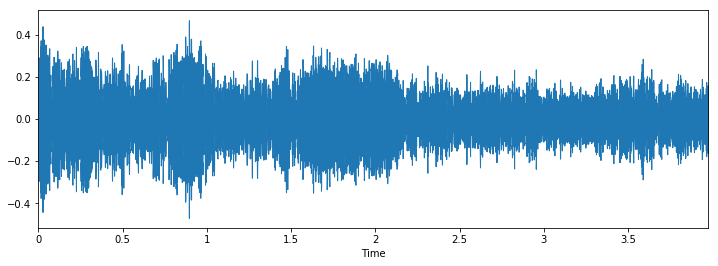

In [49]:
# Test 2 - no noise added

# Siren audio embedded in noise from data set

filename = 'C:/Users/Gabe/Documents/PYTHON/Udacity-ML-Capstone-master/UrbanSound Dataset sample/audio/siren3.wav' 

plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)

print_prediction(filename)

ipd.Audio(filename)

probability not siren:  0.010631013 
probability siren:  0.989369


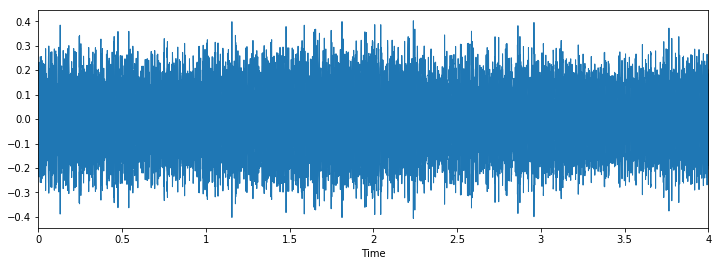

In [5]:
filename = 'C:/Users/Gabe/Documents/PYTHON/Udacity-ML-Capstone-master/UrbanSound Dataset sample/audio/siren.wav' 

print_prediction(filename)

plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

probability not siren:  0.04361024 
probability siren:  0.9563897


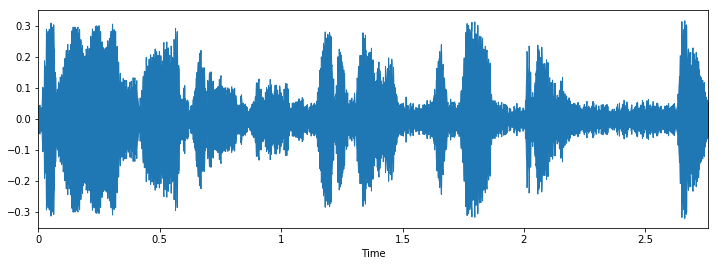

In [7]:
filename = 'C:/users/Gabe/Documents/PYTHON/Udacity-ML-Capstone-master/Evaluation audio/sirenwithcarnoise.wav' 

print_prediction(filename)

plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

probability not siren:  0.9933709 
probability siren:  0.006629094


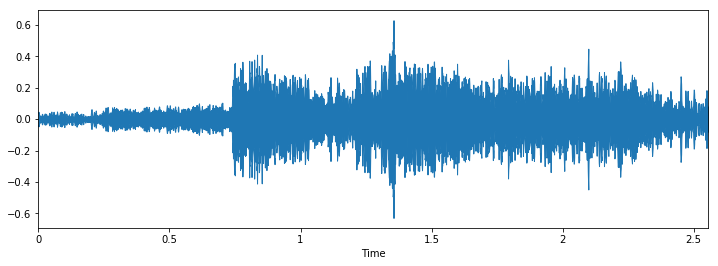

In [6]:
filename = 'C:/Users/Gabe/Documents/PYTHON/Udacity-ML-Capstone-master/Evaluation audio/drilling_1.wav' 

print_prediction(filename)

plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

probability not siren:  0.77474236 
probability siren:  0.22525765


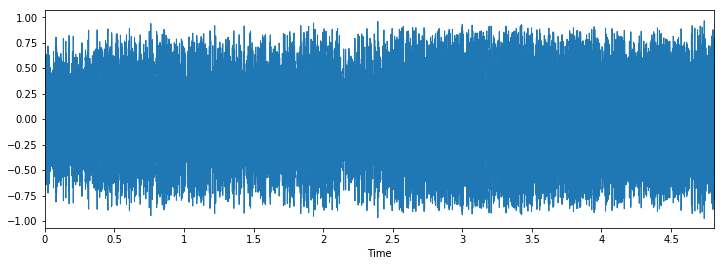

In [8]:
filename = 'C:/users/Gabe/Documents/PYTHON/Udacity-ML-Capstone-master/Evaluation audio/street-daniel_simon.wav' 

print_prediction(filename)

plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

probability not siren:  0.9962915 
probability siren:  0.003708468


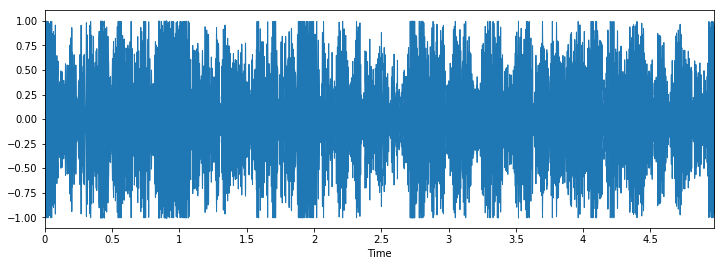

In [10]:
filename = 'C:/users/Gabe/Documents/PYTHON/Udacity-ML-Capstone-master/Evaluation audio/real time recording in car.wav' 

print_prediction(filename)

plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)